In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_1d import ode_y, ode_y_jump
from numba import njit

**ODE of y on (0, 2)**:
\begin{align*}
0 = \max_{\tilde{e}} \min_h &  -\delta \phi(y) + \delta \eta \log \tilde{e} \\
&+\frac{\xi_m}{2}h^\prime h + \frac{d\phi(y)}{dy}\tilde{e}(\theta + \sigma_y \cdot h) + \frac{1}{2} \frac{d^2 \phi(y)}{(d y)^2}|\sigma_y|^2(\tilde{e})^2\\
&+ (\eta-1)\left[\gamma_1 + \gamma_2 y\right]\tilde{e}(\theta + \sigma_y \cdot h)\\
& -\xi_m\frac{1}{\sqrt{2\pi}\varsigma}\exp\{-\frac{(\bar{y}-y)^2}{2\varsigma^2}\} \log\sum_{j=1}^m \hat{\pi}_j^d \exp\left(\frac{1}{\xi_m}\left[\phi(y)-\phi_j(y)\right]\right)\\
\end{align*}

The FOC of $\tilde{e}$ gives:
$$
\tilde{e}^* = \frac{-B + \sqrt{B^2-4AC}}{2C}
$$

where $A = \delta \eta$, $B = \left(\frac{d\phi}{dy}+(\eta-1)\left[\gamma_1 + \gamma_2 y)\right] \right)(\theta+\sigma_y\cdot h)$, $C = \frac{d^2\phi}{dy^2}\sigma_y^2$.

The FOC of $h$ gives:
$$
h^* = -\frac{\left(\frac{d\phi}{dy} + (\eta-1)\left[\gamma_1 + \gamma_2 y \right]\right)\tilde{e}\sigma_y}{\xi_m}
$$

In [104]:
# Model parameters
η = .032
δ = .01

θ = 1.86/1000.
σ_y = 0.

ξ_m = 1./4000

γ_1 = 1.7675/10000
γ_2 = 0.0022*2
γ_2p = np.array([0, 0.0197*2]) # two damages
πd_o = np.array([.5, .5])
y_bar = 2.

n_y = 100
y_grid_long = np.linspace(1e-10, 10, n_y)
y_grid_short = np.linspace(1e-10, 2, n_y)

In [105]:
ϕ = []
e_tilde = []
for γ_2p_i in γ_2p:
    model_paras = (η, δ, θ, σ_y, ξ_m, γ_1, γ_2, γ_2p_i, y_bar) 
    ϕ_i, e_tilde_i = ode_y(y_grid_long, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1_000)
    ϕ.append(ϕ_i)
    e_tilde.append(e_tilde_i)

ϕ_i_list = []
for ϕ_i in ϕ:
    temp = np.interp(y_grid_short, y_grid_long, ϕ_i)
    ϕ_i_list.append(temp)
ϕ_i = np.array(ϕ_i_list)

Iteration 1: LHS Error: 0.001297580012426158; RHS Error 0.001466143681438778
Iteration 2: LHS Error: 0.0011955111518943912; RHS Error 0.001292137455489656
Iteration 3: LHS Error: 0.0011325986606872318; RHS Error 0.001199487841533061
Iteration 4: LHS Error: 0.0010887130808030338; RHS Error 0.0011398038001686444
Iteration 5: LHS Error: 0.001053990856355865; RHS Error 0.0010946735111905302
Iteration 6: LHS Error: 0.001024419772264011; RHS Error 0.0010576198552109378
Iteration 7: LHS Error: 0.0009982565948703928; RHS Error 0.0010258995453551482
Iteration 8: LHS Error: 0.0009753822161351604; RHS Error 0.000998084726703601
Iteration 9: LHS Error: 0.0009535220343421923; RHS Error 0.0009733003252784935
Iteration 10: LHS Error: 0.0009335456946446274; RHS Error 0.0009509541995043802
Iteration 11: LHS Error: 0.000915114385623108; RHS Error 0.0009306018100158207
Iteration 12: LHS Error: 0.0008984009313069766; RHS Error 0.0009119025441347141
Iteration 13: LHS Error: 0.0008823190921932022; RHS Error

Iteration 227: LHS Error: 0.0001611368867990015; RHS Error 0.00016134147752360243
Iteration 228: LHS Error: 0.0001601306375711431; RHS Error 0.0001603331503201783
Iteration 229: LHS Error: 0.0001591314859259868; RHS Error 0.00015933194354358243
Iteration 230: LHS Error: 0.0001581393723205371; RHS Error 0.0001583377973588976
Iteration 231: LHS Error: 0.00015715423784677662; RHS Error 0.00015735065257070884
Iteration 232: LHS Error: 0.00015617602422281218; RHS Error 0.00015637045061399368
Iteration 233: LHS Error: 0.00015520467378378477; RHS Error 0.0001553971335451277
Iteration 234: LHS Error: 0.0001542401294733764; RHS Error 0.00015443064403312793
Iteration 235: LHS Error: 0.00015328233483503928; RHS Error 0.00015347092535099955
Iteration 236: LHS Error: 0.0001523312340037386; RHS Error 0.00015251792136729075
Iteration 237: LHS Error: 0.0001513867716977646; RHS Error 0.0001515715765377844
Iteration 238: LHS Error: 0.0001504488932104614; RHS Error 0.0001506318358973339
Iteration 239: LH

Iteration 518: LHS Error: 3.7234740076967296e-05; RHS Error 3.713979900385936e-05
Iteration 519: LHS Error: 3.70570847939046e-05; RHS Error 3.696329215627735e-05
Iteration 520: LHS Error: 3.688027390287042e-05; RHS Error 3.6787622399980376e-05
Iteration 521: LHS Error: 3.6704303397772434e-05; RHS Error 3.6612785783555785e-05
Iteration 522: LHS Error: 3.652916929162281e-05; RHS Error 3.6438778374195074e-05
Iteration 523: LHS Error: 3.635486761643936e-05; RHS Error 3.626559625760707e-05
Iteration 524: LHS Error: 3.618139442316051e-05; RHS Error 3.609323553792865e-05
Iteration 525: LHS Error: 3.600874578153779e-05; RHS Error 3.592169233763923e-05
Iteration 526: LHS Error: 3.5836917780059444e-05; RHS Error 3.5750962797472704e-05
Iteration 527: LHS Error: 3.5665906525846405e-05; RHS Error 3.5581043076332036e-05
Iteration 528: LHS Error: 3.549570814458461e-05; RHS Error 3.541192935120259e-05
Iteration 529: LHS Error: 3.532631878039316e-05; RHS Error 3.524361781706757e-05
Iteration 530: LHS E

Iteration 784: LHS Error: 1.0397836260608168e-05; RHS Error 1.0456486866223738e-05
Iteration 785: LHS Error: 1.0347949726655786e-05; RHS Error 1.040684964615856e-05
Iteration 786: LHS Error: 1.0298301480776706e-05; RHS Error 1.0357449386510666e-05
Iteration 787: LHS Error: 1.0248890390127108e-05; RHS Error 1.0308284961941099e-05
Iteration 788: LHS Error: 1.019971532721306e-05; RHS Error 1.0259355252425755e-05
Iteration 789: LHS Error: 1.0150775169876641e-05; RHS Error 1.0210659143229038e-05
Iteration 790: LHS Error: 1.010206880128206e-05; RHS Error 1.0162195524880089e-05
Iteration 791: LHS Error: 1.0053595109877494e-05; RHS Error 1.0113963293148187e-05
Iteration 792: LHS Error: 1.0005352989356925e-05; RHS Error 1.0065961349017474e-05
Iteration 793: LHS Error: 9.957341338670544e-06; RHS Error 1.0018188598661873e-05
Iteration 794: LHS Error: 9.909559061972717e-06; RHS Error 9.970643953423179e-06
Iteration 795: LHS Error: 9.862005068590751e-06; RHS Error 9.92332632978407e-06
Iteration 796

Iteration 74: LHS Error: 0.00046101428253496335; RHS Error 0.0004627044327270575
Iteration 75: LHS Error: 0.00045703815464056413; RHS Error 0.00045870961874248093
Iteration 76: LHS Error: 0.0004530982854249188; RHS Error 0.00045475180942444184
Iteration 77: LHS Error: 0.00044919384279829694; RHS Error 0.00045083011846625
Iteration 78: LHS Error: 0.00044532404477928833; RHS Error 0.00044694371207880585
Iteration 79: LHS Error: 0.00044148815709402905; RHS Error 0.00044309180653459687
Iteration 80: LHS Error: 0.00043768549081165536; RHS Error 0.0004392736657450512
Iteration 81: LHS Error: 0.0004339154000205653; RHS Error 0.0004354885988745082
Iteration 82: LHS Error: 0.00043017727954929724; RHS Error 0.00043173595799463125
Iteration 83: LHS Error: 0.0004264705627375909; RHS Error 0.0004280151357833621
Iteration 84: LHS Error: 0.0004227947192613768; RHS Error 0.00042432556327249497
Iteration 85: LHS Error: 0.0004191492530171148; RHS Error 0.0004206667076481357
Iteration 86: LHS Error: 0.00

Iteration 358: LHS Error: 3.887154828692563e-05; RHS Error 3.908528711924305e-05
Iteration 359: LHS Error: 3.867825046127704e-05; RHS Error 3.889196579884746e-05
Iteration 360: LHS Error: 3.848591234066612e-05; RHS Error 3.8699604873698766e-05
Iteration 361: LHS Error: 3.8294529173935055e-05; RHS Error 3.8508199580523364e-05
Iteration 362: LHS Error: 3.810409623333788e-05; RHS Error 3.831774517960282e-05
Iteration 363: LHS Error: 3.791460881423514e-05; RHS Error 3.8128236954658706e-05
Iteration 364: LHS Error: 3.7726062235080016e-05; RHS Error 3.793967021273759e-05
Iteration 365: LHS Error: 3.7538451837376696e-05; RHS Error 3.7752040284096534e-05
Iteration 366: LHS Error: 3.735177298538894e-05; RHS Error 3.7565342522089614e-05
Iteration 367: LHS Error: 3.716602106625111e-05; RHS Error 3.737957230305432e-05
Iteration 368: LHS Error: 3.6981191489732224e-05; RHS Error 3.719472502619842e-05
Iteration 369: LHS Error: 3.679727968812496e-05; RHS Error 3.70107961134888e-05
Iteration 370: LHS E

Iteration 636: LHS Error: 9.71910977738688e-06; RHS Error 1.740201780403458e-05
Iteration 637: LHS Error: 9.670771565065128e-06; RHS Error 1.739666598188095e-05
Iteration 638: LHS Error: 9.62267351664603e-06; RHS Error 1.7391409643286425e-05
Iteration 639: LHS Error: 9.574814440305168e-06; RHS Error 1.7386247826326883e-05
Iteration 640: LHS Error: 9.527193150185576e-06; RHS Error 1.7381179577509345e-05
Iteration 641: LHS Error: 9.479808466245077e-06; RHS Error 1.7376203951698186e-05
Iteration 642: LHS Error: 9.432659214325678e-06; RHS Error 1.737132001204878e-05
Iteration 643: LHS Error: 9.385744226125814e-06; RHS Error 1.7366526829932323e-05
Iteration 644: LHS Error: 9.339062339075443e-06; RHS Error 1.7361823484870218e-05
Iteration 645: LHS Error: 9.29261239634993e-06; RHS Error 1.7357209064463295e-05
Iteration 646: LHS Error: 9.246393246967188e-06; RHS Error 1.7352682664324964e-05
Iteration 647: LHS Error: 9.200403745482366e-06; RHS Error 1.734824338801166e-05
Iteration 648: LHS Erro

Iteration 913: LHS Error: 2.441640740952211e-06; RHS Error 1.755654772040853e-05
Iteration 914: LHS Error: 2.4294984537348574e-06; RHS Error 1.7558953657123577e-05
Iteration 915: LHS Error: 2.4174164912627027e-06; RHS Error 1.7561358152204864e-05
Iteration 916: LHS Error: 2.405394554136353e-06; RHS Error 1.756376114427923e-05
Iteration 917: LHS Error: 2.3934323444968486e-06; RHS Error 1.756616257273945e-05
Iteration 918: LHS Error: 2.381529565900764e-06; RHS Error 1.7568562377736263e-05
Iteration 919: LHS Error: 2.369685923417353e-06; RHS Error 1.7570960500173818e-05
Iteration 920: LHS Error: 2.3579011235591585e-06; RHS Error 1.75733568817003e-05
Iteration 921: LHS Error: 2.346174874226503e-06; RHS Error 1.757575146470446e-05
Iteration 922: LHS Error: 2.3345068849295325e-06; RHS Error 1.7578144192305367e-05
Iteration 923: LHS Error: 2.3228968664690264e-06; RHS Error 1.758053500834644e-05
Iteration 924: LHS Error: 2.311344531130688e-06; RHS Error 1.7582923857390094e-05
Iteration 925: LH

In [106]:
ς = .1
model_paras = η, δ, θ, σ_y, ξ_m, ς, γ_1, γ_2, y_bar, ϕ_i, πd_o
ϕ, e_tilde = ode_y_jump(y_grid_short, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1_000)

Iteration 1: LHS Error: 0.0288880942600579; RHS Error 0.029000760576065432
Iteration 2: LHS Error: 0.011986791189677461; RHS Error 0.01264133798130053
Iteration 3: LHS Error: 0.007172906468793674; RHS Error 0.007233315332446619
Iteration 4: LHS Error: 0.0049321804929890085; RHS Error 0.0049635507690379615
Iteration 5: LHS Error: 0.003619558528713894; RHS Error 0.0036557977101885873
Iteration 6: LHS Error: 0.0027492572466779053; RHS Error 0.004045104300697122
Iteration 7: LHS Error: 0.0029875492493429993; RHS Error 0.00296415320629951
Iteration 8: LHS Error: 0.005102770108649332; RHS Error 0.0030940762983625043
Iteration 9: LHS Error: 0.002678209762116945; RHS Error 0.003998655167340532
Iteration 10: LHS Error: 0.0017593815434744746; RHS Error 0.004295008235082122
Iteration 11: LHS Error: 0.004911817313704606; RHS Error 0.0031175661444788815
Iteration 12: LHS Error: 0.0025156156766513553; RHS Error 0.009283878985018344
Iteration 13: LHS Error: 0.0016506642766070875; RHS Error 0.00240599

Iteration 187: LHS Error: 0.00010505080999798078; RHS Error 0.0001065878208098411
Iteration 188: LHS Error: 0.00010302713870427582; RHS Error 0.00010454593803469099
Iteration 189: LHS Error: 0.00010103117424761776; RHS Error 0.00010253197762998413
Iteration 190: LHS Error: 9.906257670565244e-05; RHS Error 0.00010054559353258664
Iteration 191: LHS Error: 9.712101362331638e-05; RHS Error 9.858644728390643e-05
Iteration 192: LHS Error: 9.52061598505638e-05; RHS Error 9.665420786302838e-05
Iteration 193: LHS Error: 9.331769738607498e-05; RHS Error 9.474855152564717e-05
Iteration 194: LHS Error: 9.14553152252251e-05; RHS Error 9.28691616477684e-05
Iteration 195: LHS Error: 8.961870921304904e-05; RHS Error 9.101572857447718e-05
Iteration 196: LHS Error: 8.780758190132798e-05; RHS Error 8.918794947320894e-05
Iteration 197: LHS Error: 8.60216424100474e-05; RHS Error 8.738552819135062e-05
Iteration 198: LHS Error: 8.426060629243559e-05; RHS Error 8.560817511800889e-05
Iteration 199: LHS Error: 

Iteration 355: LHS Error: 2.5713666931825863e-08; RHS Error 1.6156284167290202e-05
Iteration 356: LHS Error: 2.334414508919913e-08; RHS Error 1.6156283904972257e-05
Iteration 357: LHS Error: 2.1184362694603998e-08; RHS Error 1.6156283668120053e-05
Iteration 358: LHS Error: 1.9216921540166076e-08; RHS Error 1.6156283454443754e-05
Iteration 359: LHS Error: 1.742573695062699e-08; RHS Error 1.6156283261833937e-05
Iteration 360: LHS Error: 1.5795952490460508e-08; RHS Error 1.6156283088333834e-05
Iteration 361: LHS Error: 1.4313857904513227e-08; RHS Error 1.6156282932139332e-05
Iteration 362: LHS Error: 1.2966811749337559e-08; RHS Error 1.6156282791703058e-05
Iteration 363: LHS Error: 1.1743168409905635e-08; RHS Error 1.6156282665491517e-05
Iteration 364: LHS Error: 1.0632208558014611e-08; RHS Error 1.6156282552158563e-05
Iteration 365: LHS Error: 9.624073801783872e-09; RHS Error 1.6156282450434378e-05


In [107]:
# Compute worst case probabilities
π = np.ones((len(πd_o), len(y_grid_short)))
for i in range(π.shape[0]):
    π[i] = πd_o[i]
πd_o_reshape = π
πd = np.exp(1./ξ_m*(ϕ-ϕ_i[0])) / np.sum(πd_o_reshape*np.exp(1./ξ_m*(ϕ-ϕ_i)), axis=0)*πd_o[i]

In [108]:
@njit
def simulation(y_grid, e_grid, π_grid, θ=1.86/1000., y_start=.5394, T=50):
    Et = np.zeros(T+1)
    πt = np.zeros(T+1)
    yt = np.zeros(T+1)
    for i in range(T+1):
        Et[i] = np.interp(y_start, y_grid, e_grid)
        πt[i] = np.interp(y_start, y_grid, π_grid)
        yt[i] = y_start
        y_start = y_start + Et[i]*θ
    return Et, πt, yt

In [111]:
Et, πt, yt = simulation(y_grid_short, e_tilde, πd, θ=1.86/1000., y_start=.5394, T=85)

Text(0.5, 0, 'Year')

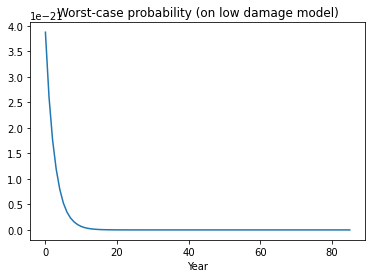

In [112]:
plt.plot(πt)
plt.title('Worst-case probability (on low damage model)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

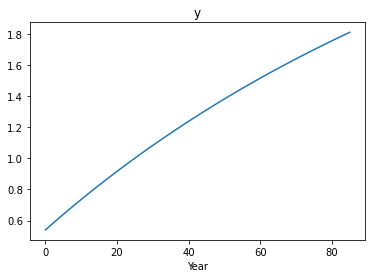

In [113]:
plt.plot(yt)
plt.title('y')
plt.xlabel('Year')

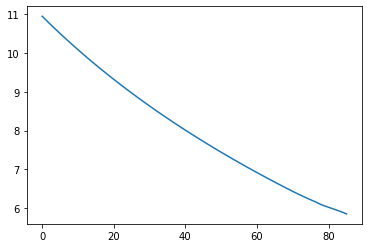

In [114]:
plt.plot(Et)